Shape of Y_shifted: (2, 10000)
Shape of X: (2, 10000)
Shape of (np.diag(xC) @ np.ones((2,nPoints))): (2, 10000)
XC= [2 1]
sigma= [2.  0.5]
Rotation matrix= [[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]
U:
 [[-0.50128273  0.86528355]
 [ 0.86528355  0.50128273]]
S:
 [[1.99319055 0.        ]
 [0.         0.49030862]]
(2, 2) (2,) (2, 10000)


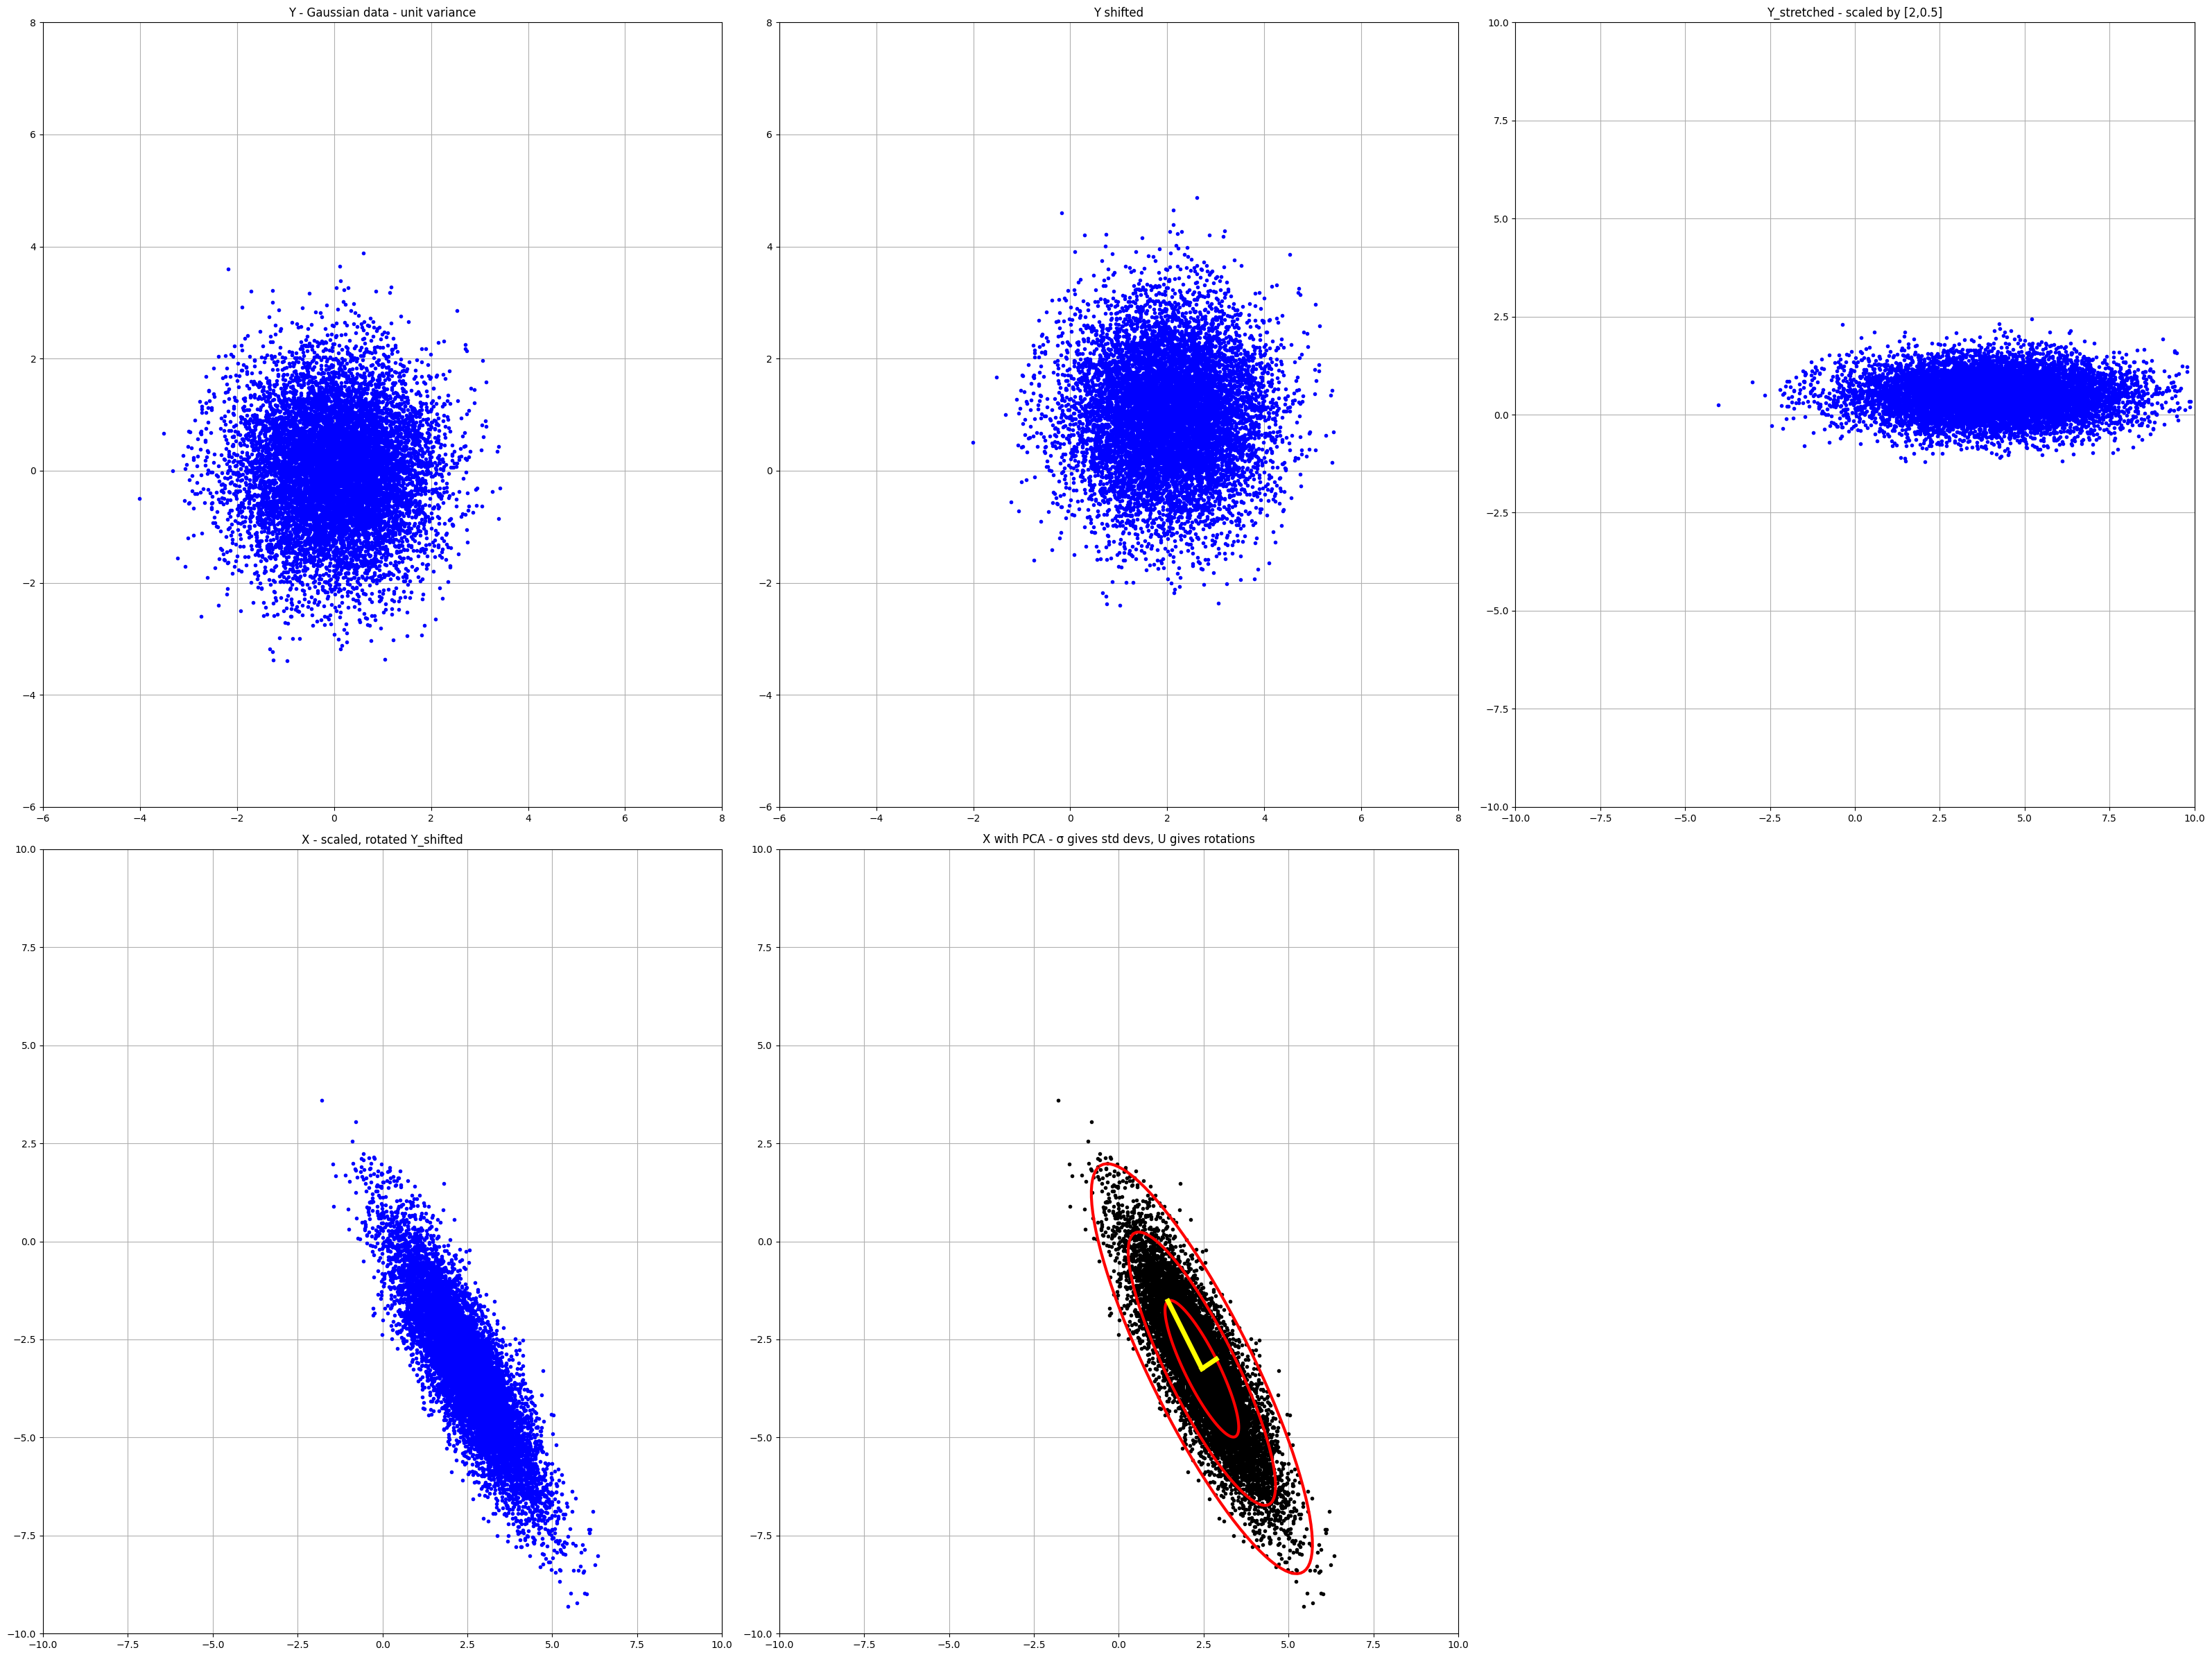

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [32, 24]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

# A different rotation matrix from the example in the book.
# A matrix is orthogonal if its transpose is also its inverse. i.e R.T @ R = I
# Determinant of an orthogonal matrix is either +1 or -1. 
# A unitary rotation matrix has determinant +1. but converse is not necessarily true.
# determinant has the physical interpretation of the area formed by the column vectors of the matrix.
R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta), np.cos(theta)]])


nPoints = 10000            # Create 10,000 points
Y = np.random.randn(2,nPoints)

Y_shifted = Y + (np.diag(xC) @ np.ones((2,nPoints)))

# Stretch data along principal axes
Y_stretched = np.diag(sig) @ Y_shifted

# Apply rotation of stretched data
X = R @ Y_stretched

print("Shape of Y_shifted:", Y_shifted.shape)
print("Shape of X:", X.shape)
print("Shape of (np.diag(xC) @ np.ones((2,nPoints))):", (np.diag(xC) @ np.ones((2,nPoints))).shape)

print( "XC=" , xC )
print("sigma=", sig)
print("Rotation matrix=", R)

# Create figure with 2 rows, 3 columns
fig = plt.figure()

# First row: Y (centered)
ax0 = fig.add_subplot(2, 3, 1)
ax0.plot(Y[0,:], Y[1,:], '.', color='blue')
ax0.set_title('Y - Gaussian data - unit variance')
ax0.grid()
ax0.set_xlim((-6, 8))
ax0.set_ylim((-6, 8))


ax1 = fig.add_subplot(2, 3, 2)
ax1.plot(Y_shifted[0,:], Y_shifted[1,:], '.', color='blue')
ax1.set_title('Y shifted')
ax1.grid()
ax1.set_xlim((-6, 8))
ax1.set_ylim((-6, 8))

# Second row: Y_stretched
ax2 = fig.add_subplot(2, 3, 3)
ax2.plot(Y_stretched[0,:], Y_stretched[1,:], '.', color='blue')
ax2.set_title('Y_stretched - scaled by [2,0.5]')
ax2.grid()
ax2.set_xlim((-10, 10))
ax2.set_ylim((-10, 10))

ax3 = fig.add_subplot(2, 3, 4)
ax3.plot(X[0,:], X[1,:], '.', color='blue')
ax3.set_title('X - scaled, rotated Y_shifted')
ax3.grid()
ax3.set_xlim((-10, 10))
ax3.set_ylim((-10, 10))

## f_ch01_ex03_1b - PCA Analysis

Xavg = np.mean(X, axis=1)                  # Compute mean
B = X - np.tile(Xavg, (nPoints, 1)).T      # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints), full_matrices=0)

print ("U:\n", U   )
print ("S:\n", np.diag(S) )
print ( np.shape(U), np.shape(S), np.shape(VT) )

ax4 = fig.add_subplot(2, 3, 5)
ax4.plot(X[0,:], X[1,:], '.', color='k')   # Plot data to overlay PCA
ax4.set_title('X with PCA - σ gives std devs, U gives rotations')
ax4.grid()
ax4.set_xlim((-10, 10))
ax4.set_ylim((-10, 10))

theta = 2 * np.pi * np.arange(0, 1, 0.01)

# 1-std, 2-std, 3-std confidence ellipses
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax4.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:], '-', color='red', linewidth=3)
ax4.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:], '-', color='red', linewidth=3)
ax4.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:], '-', color='red', linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax4.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]), '-', color='yellow', linewidth=5)
ax4.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]), '-', color='yellow', linewidth=5)

plt.tight_layout()



plt.show()

 



Shape of X: (2, 10000) - Each of the 10000 columns is a separate 2D data point
The SVD/PCA analyzes the relationships between these data points and discovers the Orthogonal Basis (Principal components) and their loadings.


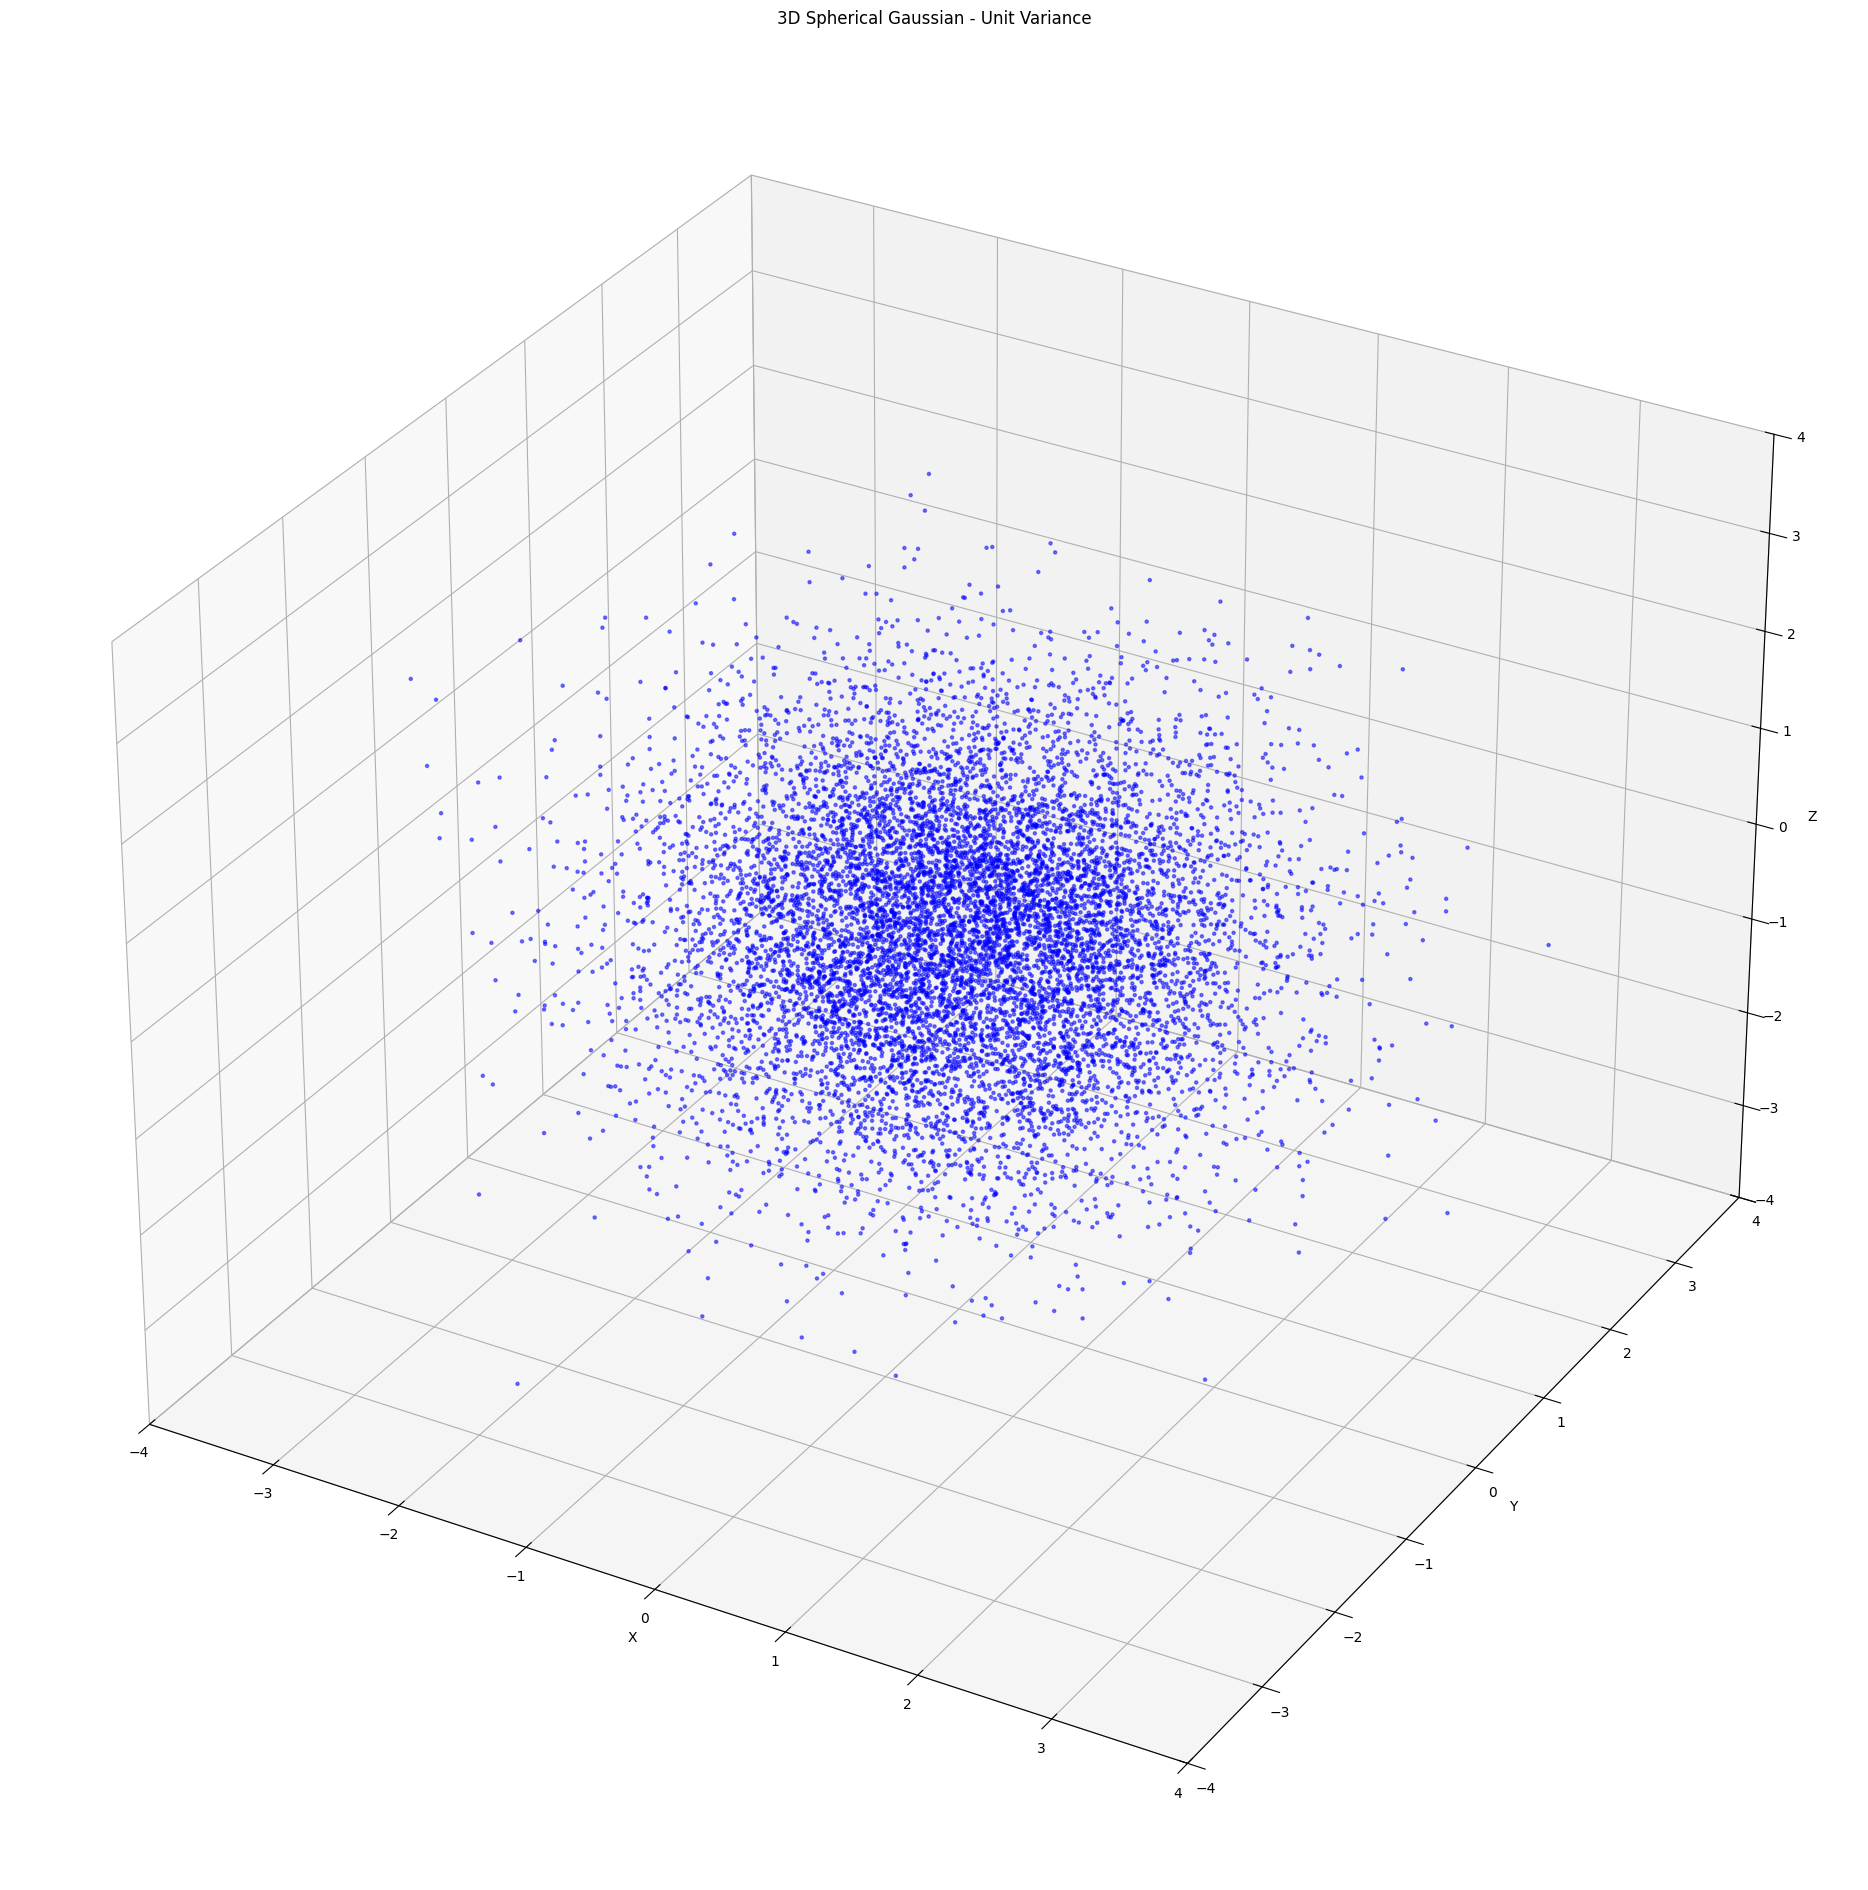

In [2]:
# Create 3D spherical Gaussian plot

# Generate 3D Gaussian data with unit variance
nPoints_3d = 10000
Y_3d = np.random.randn(3, nPoints_3d)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y_3d[0,:], Y_3d[1,:], Y_3d[2,:], c='blue', marker='.', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Spherical Gaussian - Unit Variance')
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_zlim((-4, 4))

plt.show()

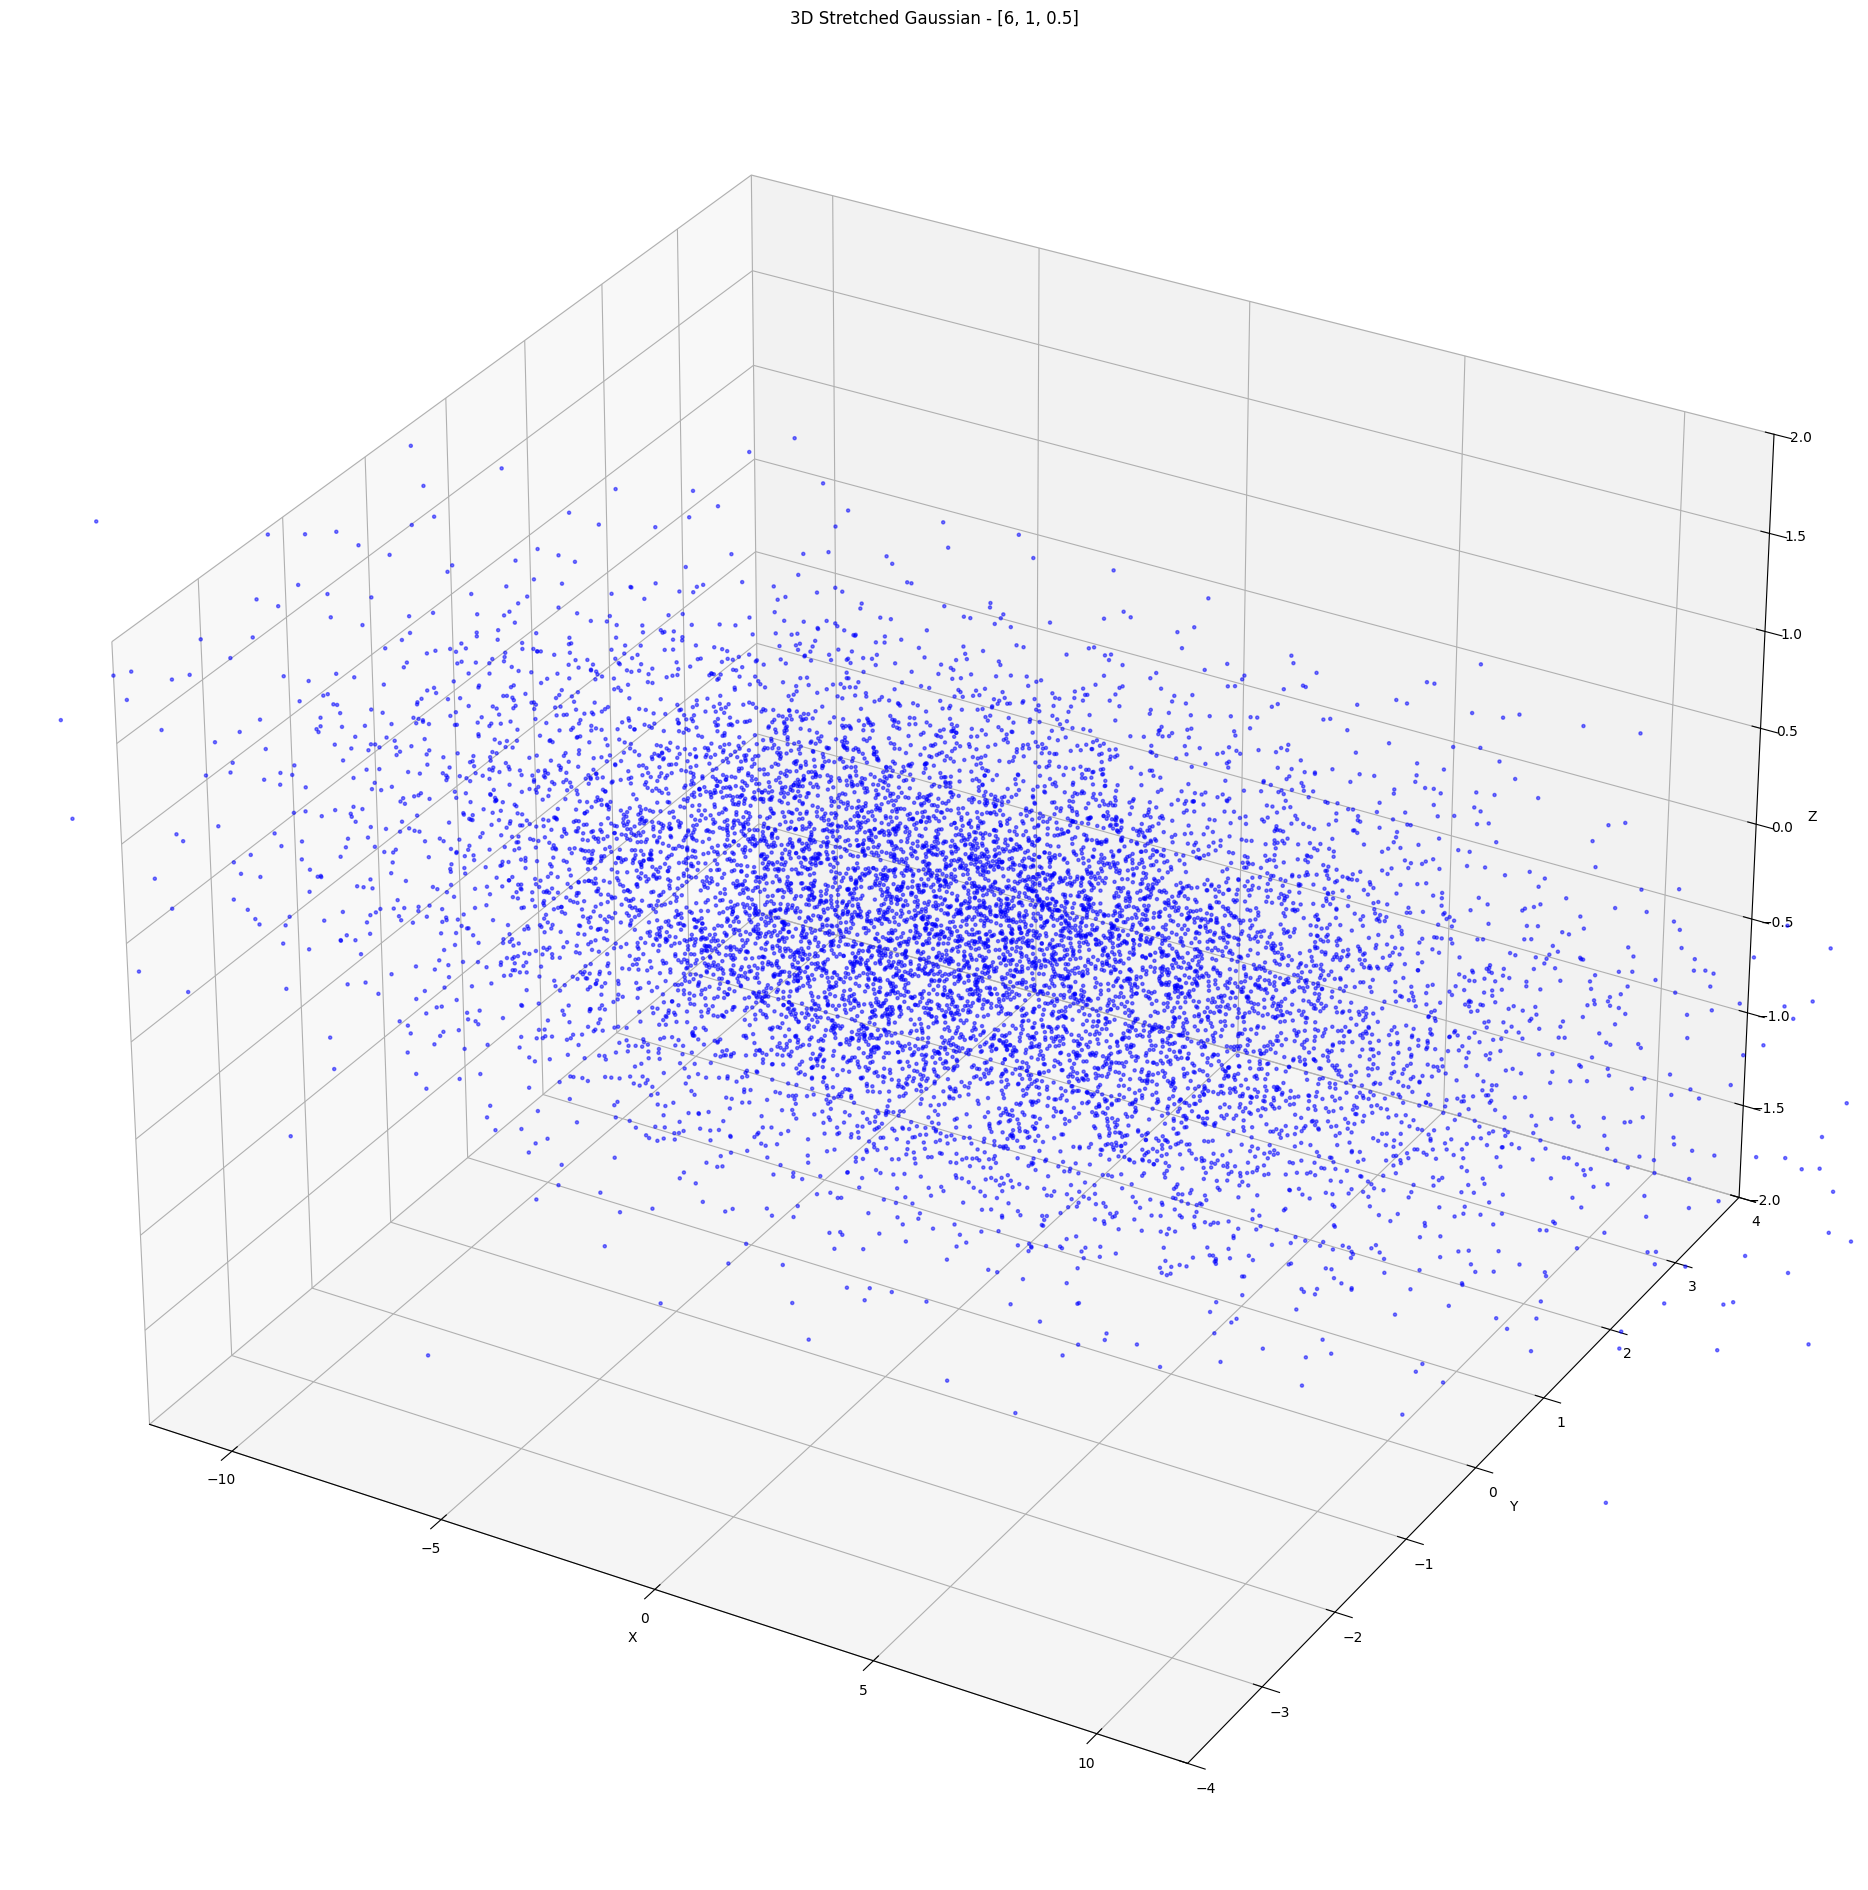

In [3]:
# Stretch the 3D Gaussian cloud by diagonal matrix with values [3, 1, 0.5]
stretch_factors = np.array([6, 1, 0.5])
Y_3d_stretched = np.diag(stretch_factors) @ Y_3d

# Create 3D plot to visualize the stretched data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y_3d_stretched[0,:], Y_3d_stretched[1,:], Y_3d_stretched[2,:], c='blue', marker='.', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Stretched Gaussian - [6, 1, 0.5]')
ax.set_xlim((-12, 12))
ax.set_ylim((-4, 4))
ax.set_zlim((-2, 2))

plt.show()

Rotation matrix around X-axis:
[[ 1.          0.          0.        ]
 [ 0.          0.9781476  -0.20791169]
 [ 0.          0.20791169  0.9781476 ]]

Rotation matrix around Y-axis:
[[ 0.93969262  0.         -0.34202014]
 [ 0.          1.          0.        ]
 [ 0.34202014  0.          0.93969262]]

Rotation matrix around Z-axis:
[[ 0.98768834  0.15643447  0.        ]
 [-0.15643447  0.98768834  0.        ]
 [ 0.          0.          1.        ]]

Combined rotation matrix:
[[ 0.92812345  0.08278149 -0.36295192]
 [-0.14700031  0.97722903 -0.1530174 ]
 [ 0.34202014  0.19537308  0.91915808]]


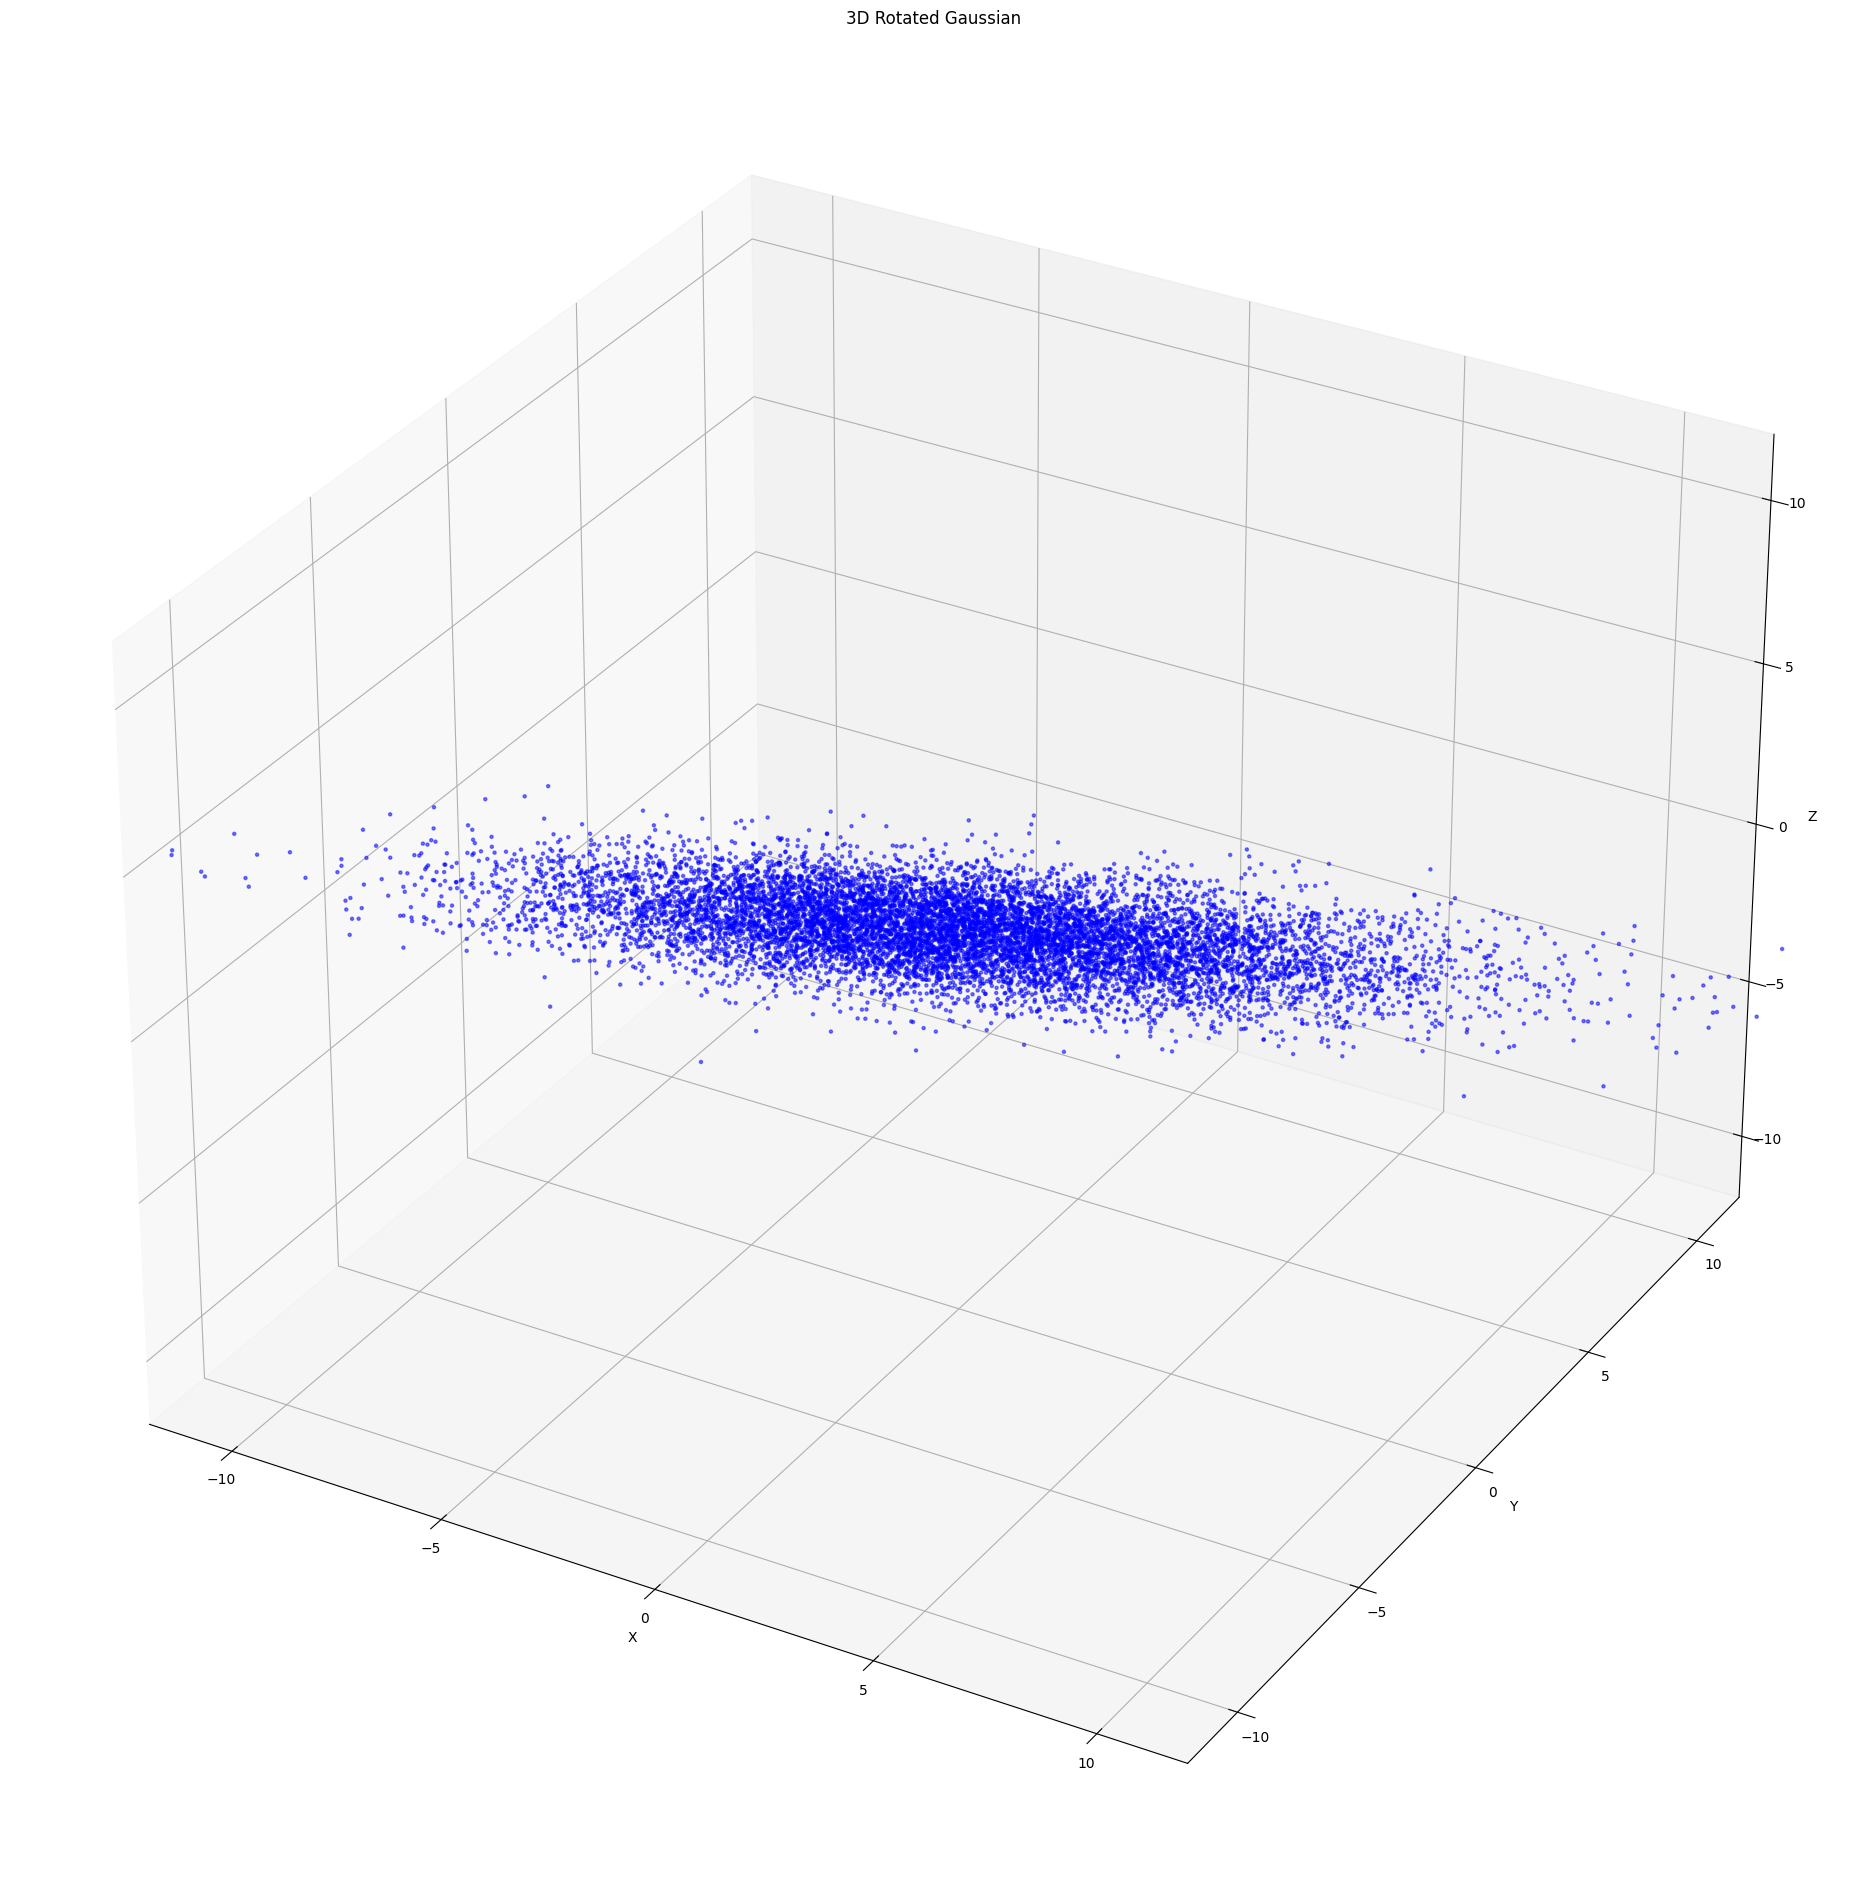

In [4]:
# Define rotation angles for each axis
theta_x = np.pi/15
theta_y = -np.pi/9
theta_z = -np.pi/20

# Create rotation matrices for each axis
# Rotation around X-axis
R_x = np.array([[1, 0, 0],
                [0, np.cos(theta_x), -np.sin(theta_x)],
                [0, np.sin(theta_x), np.cos(theta_x)]])

# Rotation around Y-axis
R_y = np.array([[np.cos(theta_y), 0, np.sin(theta_y)],
                [0, 1, 0],
                [-np.sin(theta_y), 0, np.cos(theta_y)]])

# Rotation around Z-axis
R_z = np.array([[np.cos(theta_z), -np.sin(theta_z), 0],
                [np.sin(theta_z), np.cos(theta_z), 0],
                [0, 0, 1]])

# Combined rotation matrix (order: Z * Y * X)
R_3d = R_z @ R_y @ R_x

print("Rotation matrix around X-axis:")
print(R_x)
print("\nRotation matrix around Y-axis:")
print(R_y)
print("\nRotation matrix around Z-axis:")
print(R_z)
print("\nCombined rotation matrix:")
print(R_3d)

# Apply rotation to the stretched 3D Gaussian data
Y_3d_rotated = R_3d @ Y_3d_stretched

# Visualize the rotated data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y_3d_rotated[0,:], Y_3d_rotated[1,:], Y_3d_rotated[2,:], c='blue', marker='.', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Rotated Gaussian')
ax.set_xlim((-12, 12))
ax.set_ylim((-12, 12))
ax.set_zlim((-12, 12))

plt.show()

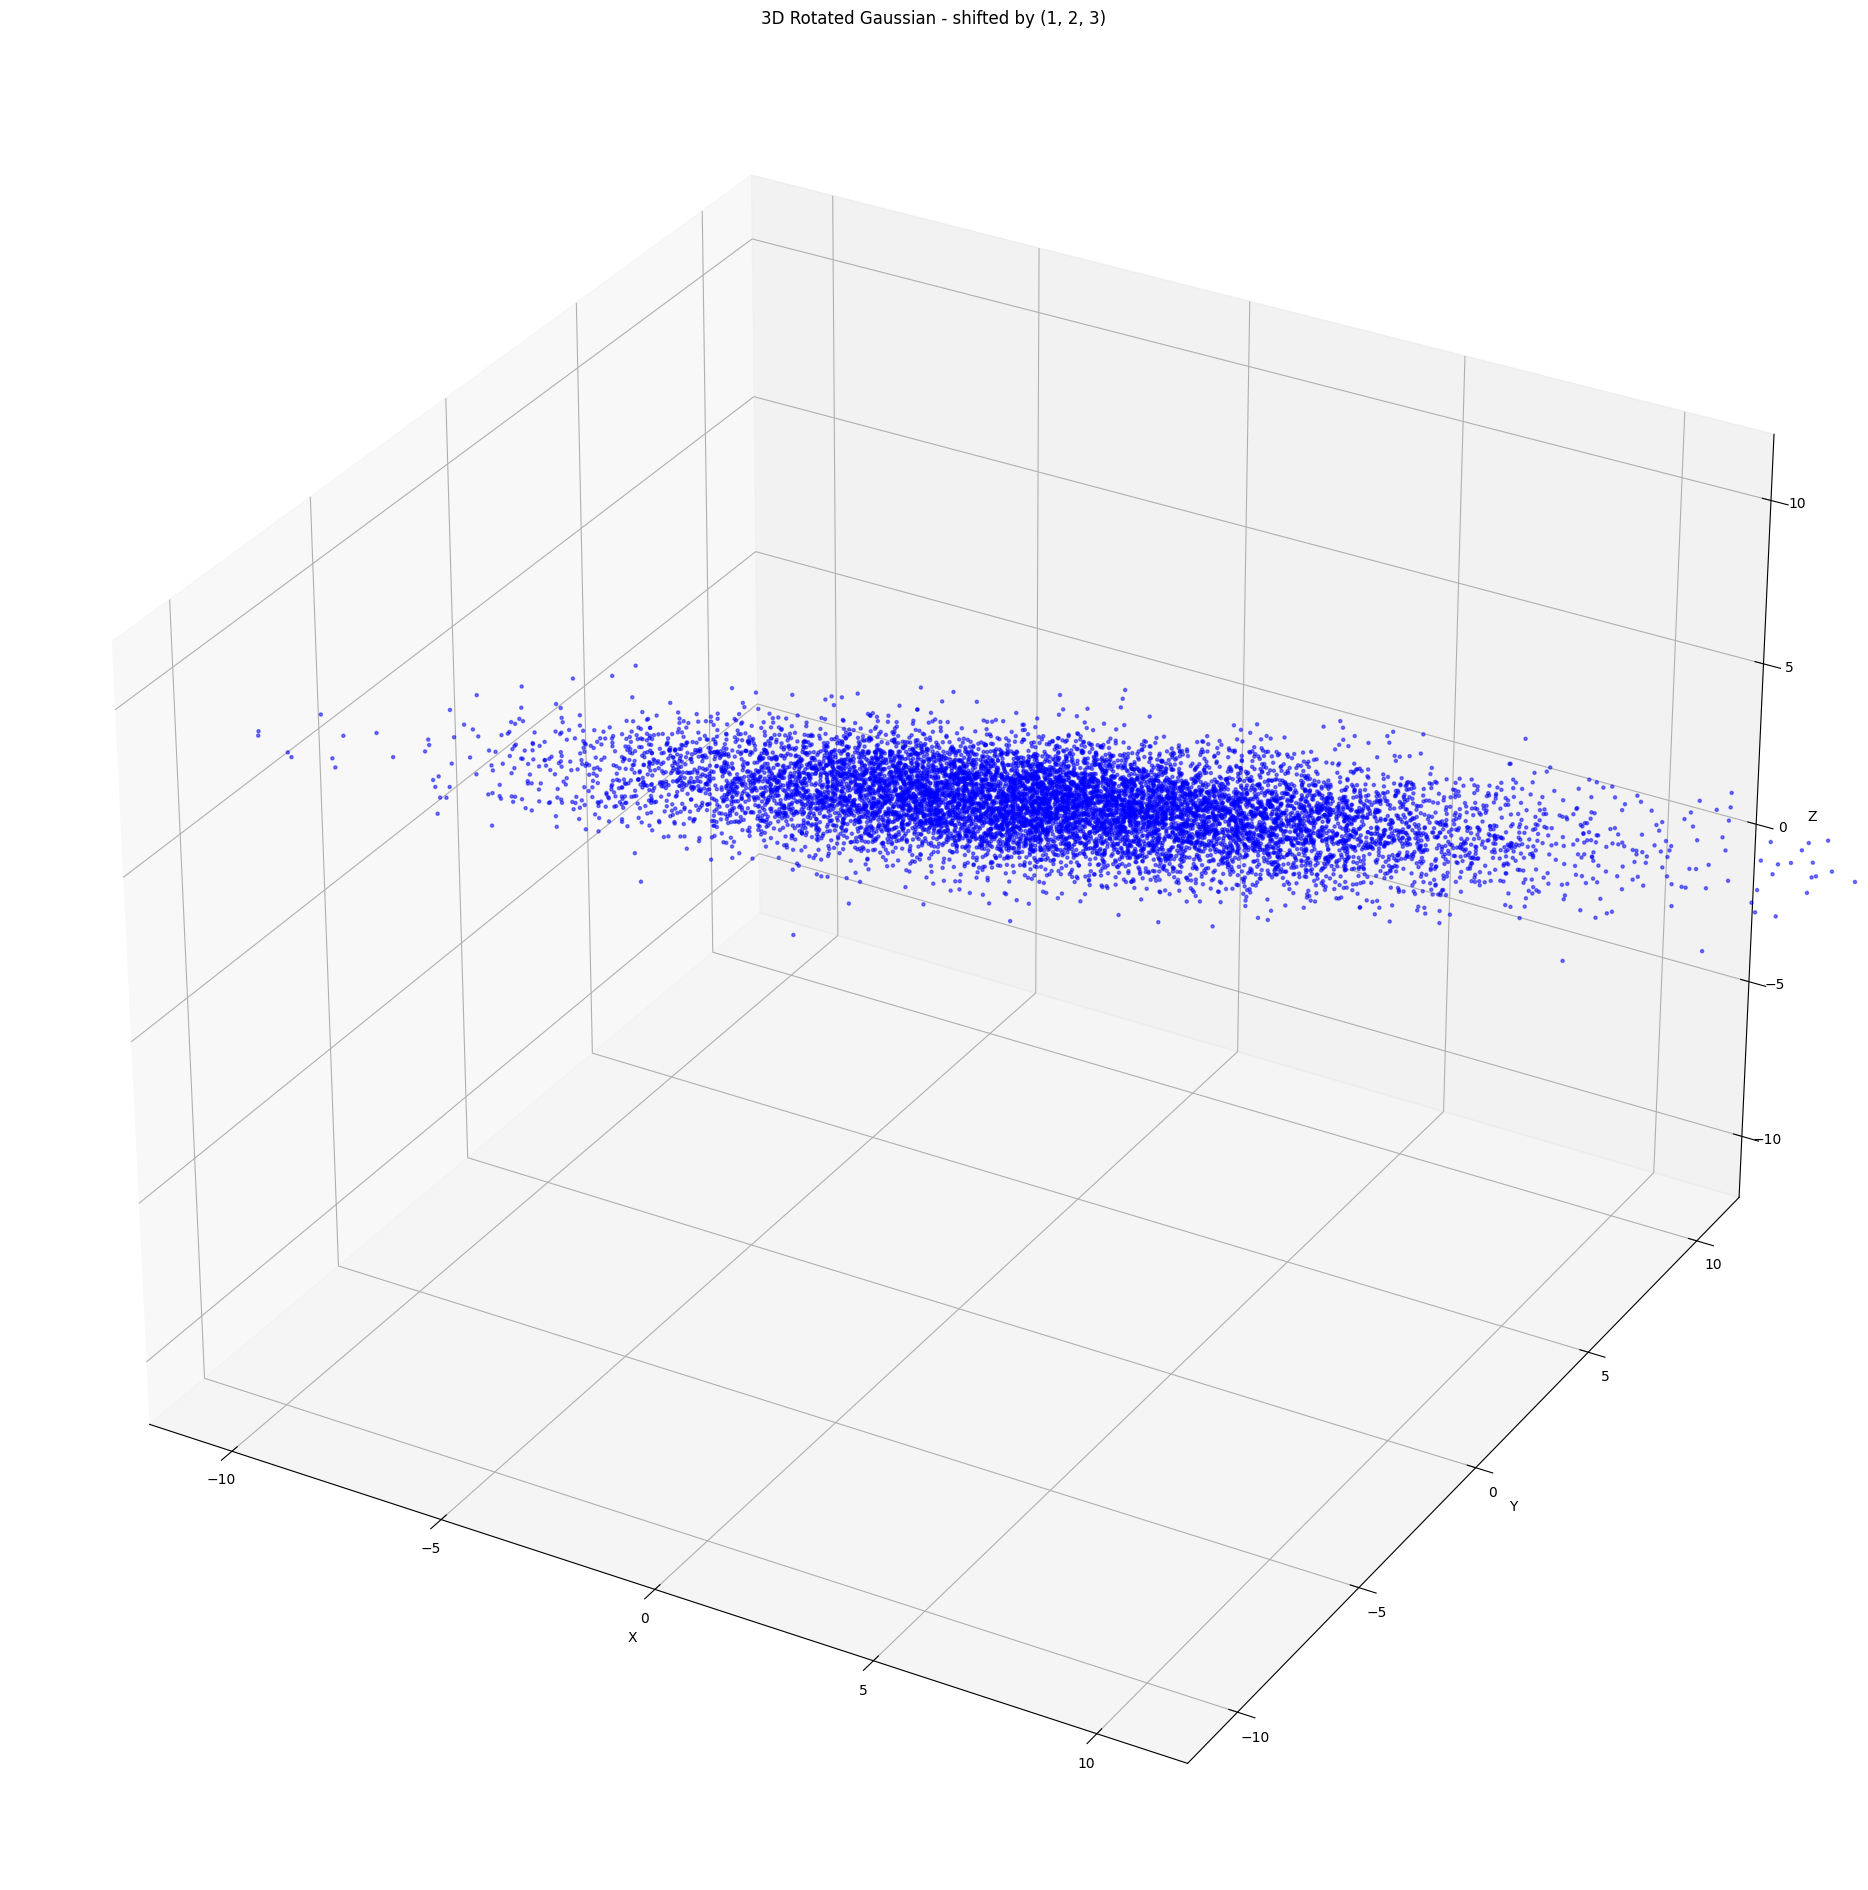

In [7]:
# Shift Y_3d_rotated by (1, 2, 3) and plot
shift_vec_3d = np.array([[1], [2], [3]])
Y_3d_rotated_shifted = Y_3d_rotated + shift_vec_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y_3d_rotated_shifted[0, :], Y_3d_rotated_shifted[1, :], Y_3d_rotated_shifted[2, :],
           c='blue', marker='.', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Rotated Gaussian - shifted by (1, 2, 3)')
ax.set_xlim((-12, 12))
ax.set_ylim((-12, 12))
ax.set_zlim((-12, 12))

plt.show()

In [11]:
# PCA/SVD on the 3D rotated data to recover axes (rotation) and sigmas
X3 = Y_3d_rotated_shifted
X3_avg = np.mean(X3, axis=1, keepdims=True)
B3 = X3 - X3_avg

U3, S3, VT3 = np.linalg.svd(B3 / np.sqrt(nPoints_3d), full_matrices=False)

print("Recovered principal components U3:\n", U3)
print("Recovered standard deviations (sigma values) S3:\n", S3)

Recovered principal components U3:
 [[-0.92937076 -0.08595456 -0.35900112]
 [ 0.14524058 -0.97921951 -0.14154263]
 [-0.33937466 -0.18368711  0.92254208]]
Recovered standard deviations (sigma values) S3:
 [5.96779926 1.01522846 0.49346395]
